# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Country-data.csv")

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<Axes: >

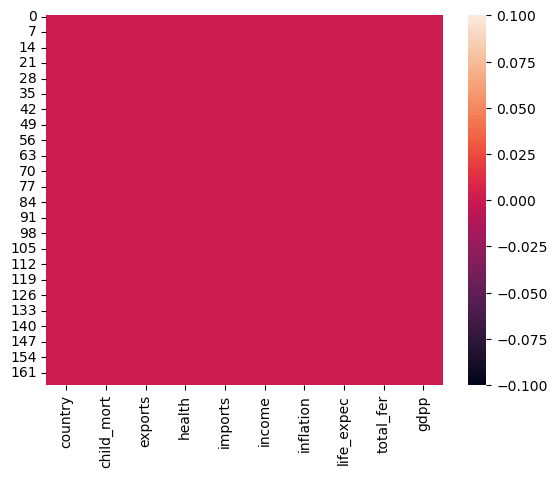

In [9]:
sns.heatmap(data.isnull())

# Exploration Data Analysis

In [10]:
num_data = data.select_dtypes(exclude = "object")
num_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
# Numerical Column
num_column = num_data.columns
num_column

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

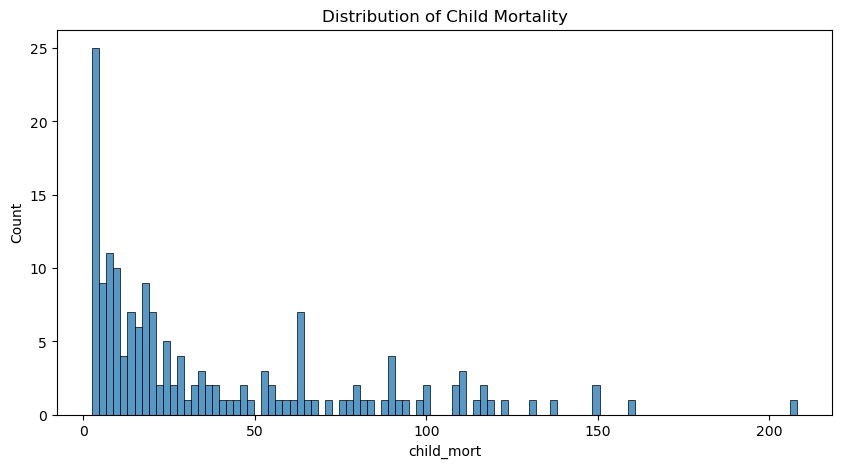

In [13]:
# Check the distribution of Age

plt.figure(figsize=(10,5))
sns.histplot(data = data["child_mort"], bins= 100);
plt.title("Distribution of Child Mortality")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

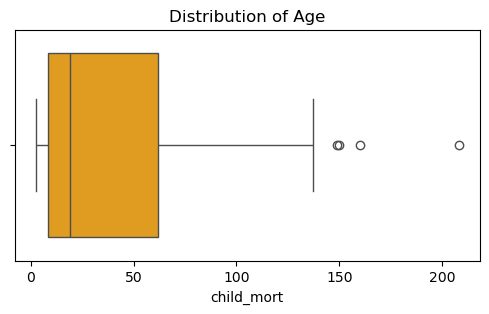

In [14]:
plt.figure(figsize=(6,3))
sns.boxplot(data = data["child_mort"], orient = 'h', color = "orange")
plt.title("Distribution of Age");
plt.show

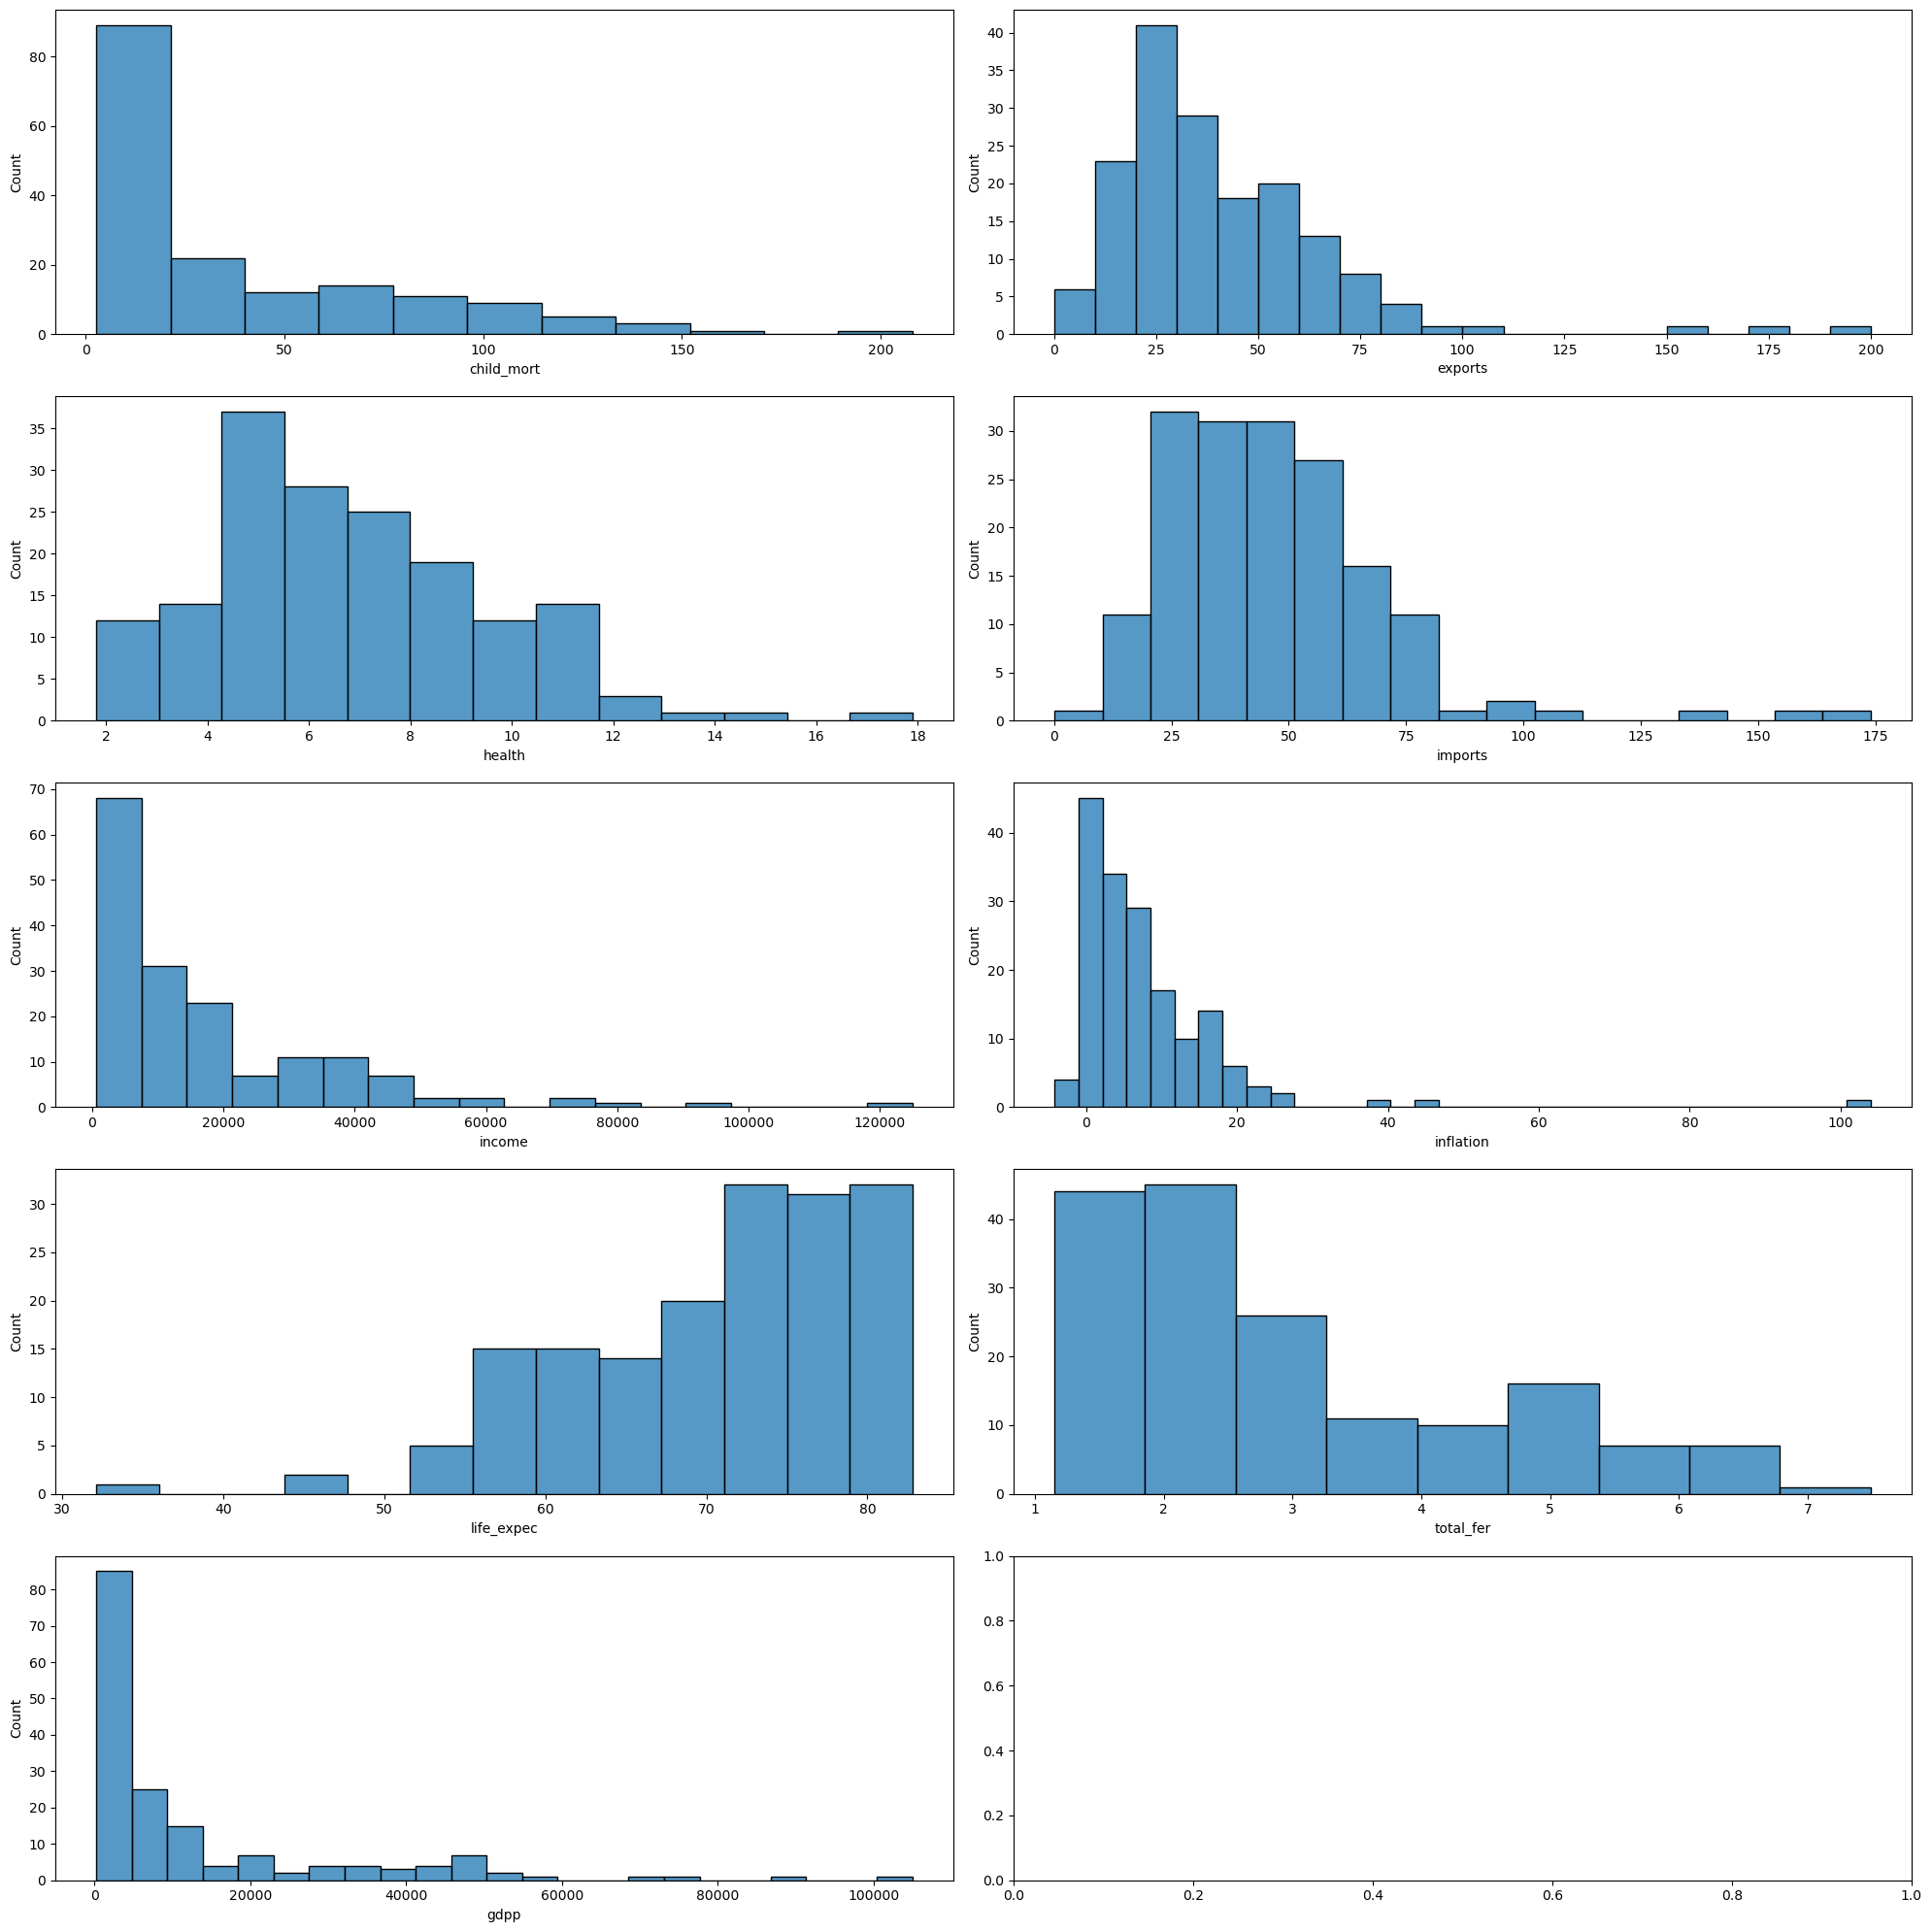

In [16]:
fig, axis = plt.subplots(nrows=5, ncols=2, figsize=(20,20))
position  = axis.flatten()

for index, name_of_feature in enumerate(num_column):
    sns.histplot(x=data[name_of_feature], ax = position[index])
    
plt.tight_layout()

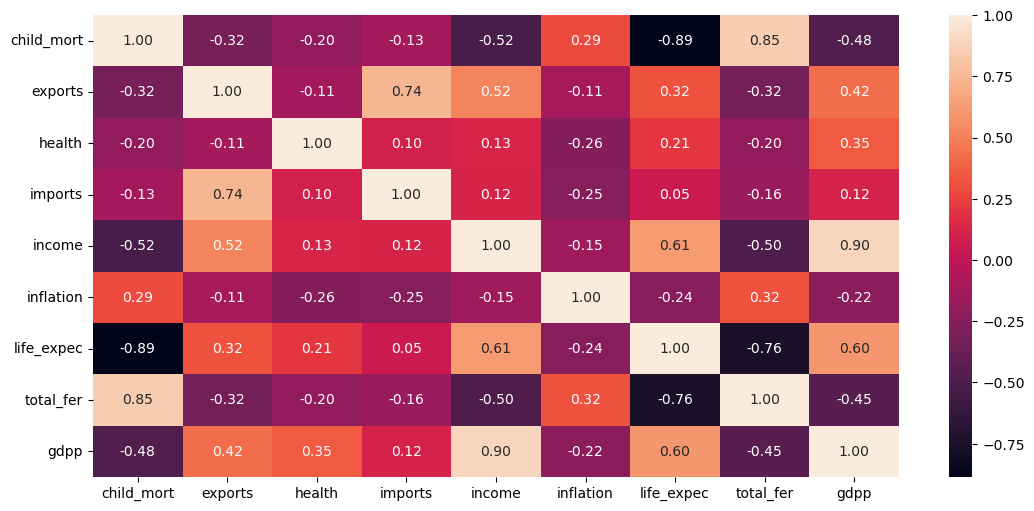

In [17]:
plt.figure(figsize = (13,6))
correlation_map = num_data.corr
sns.heatmap(correlation_map(), annot=True,  fmt = ".2f")
plt.show()

## Feature Enginering 

### Some features belong to similar categories and behave similarly with features from other categories:

### Lets create new features that fall into the three categories:

1. Health: child mortality, health, life expectancy, total fertility rate
2. Trade: imports, exports
3. Finance: income, inflation, GDP per capita

### Health Metrics
- Child Mortality (child_mort): Higher values indicate poorer health outcomes, so we want to invert this relationship.
- Life Expectancy (life_expec): Higher values are positive indicators of health.
- Health Spending (health): Higher values indicate better health investment, so this should be a positive contributor.
- Total Fertility Rate (total_fer): This can indicate population growth, but higher rates might also suggest challenges in health outcomes.

### Finance Metrics
- Income (income): Higher values indicate better economic health.
- GDP per capita (gdpp): Also a positive economic indicator.
- Inflation (inflation): Higher inflation is generally negative for financial health.


In [23]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [24]:
# Create new data that combine some related column together
new_data = pd.DataFrame()
new_data['Health'] = ((data['life_expec'] / data['life_expec'].mean()) + 
                      (data['health'] / data['health'].mean()) - 
                      (data['child_mort'] / data['child_mort'].mean()) - 
                      (data['total_fer'] / data['total_fer'].mean())
)

new_data['Trade'] = data['imports']/data['imports'].mean() +  (data['exports']/data['exports'].mean())

new_data['Finance'] = (data['income']/data['income'].mean()) + (data['gdpp']/data['gdpp'].mean()) - (data['inflation']/data['inflation'].mean())  

In [25]:
new_data.head()

,Health,Trade,Finance
0,-2.422504,1.200812,-1.076519
1,1.048966,1.717580,0.317688
2,0.002385,1.603752,-0.972476
3,-3.929096,2.430387,-2.262080
4,0.981553,2.362940,1.870058


## Feature Scaling

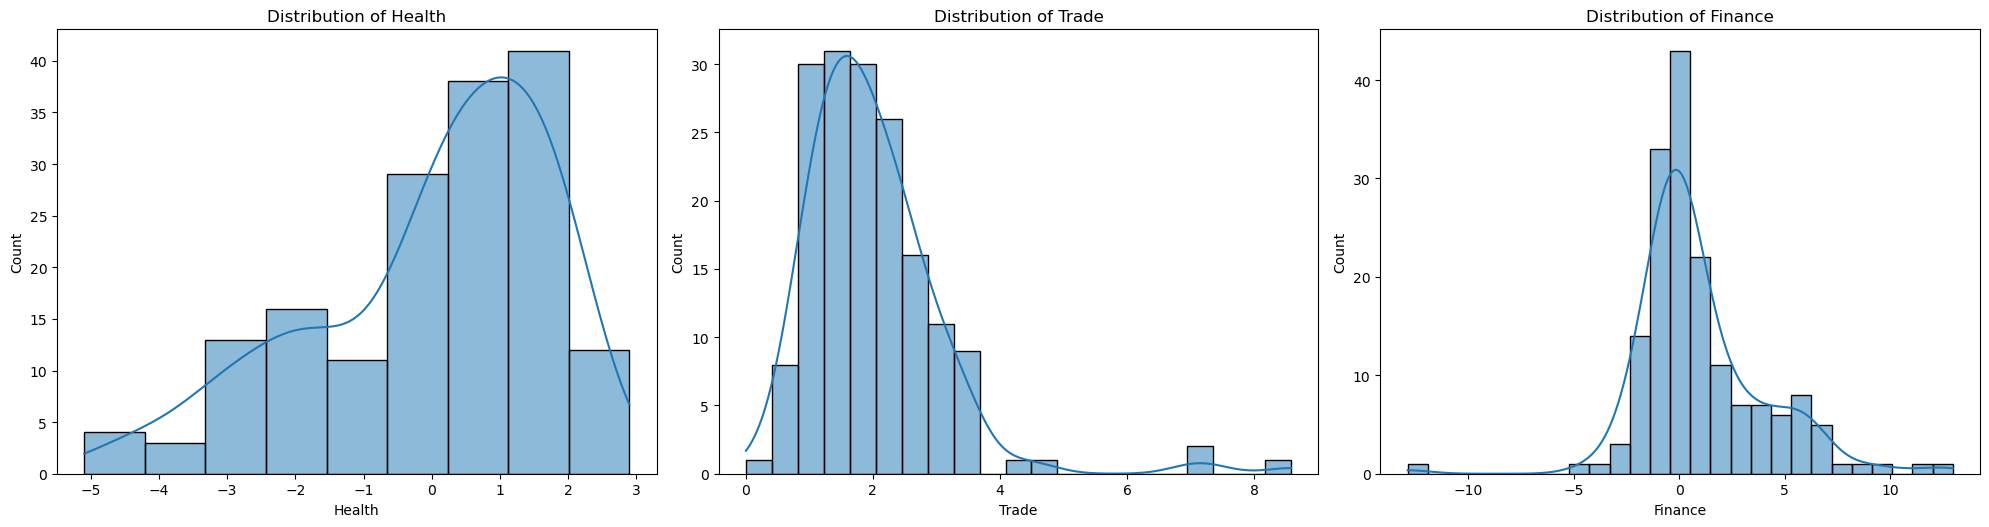

In [26]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(new_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(new_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [28]:
scaler = StandardScaler()

In [29]:
new_data["Health"] = scaler.fit_transform(new_data[["Health"]])

In [30]:
new_data["Finance"] = scaler.fit_transform(new_data[["Finance"]])

In [31]:
new_data["Trade"] = scaler.fit_transform(new_data[["Trade"]])

## Modeling (K-Means)

In [32]:
from sklearn.cluster import KMeans

C:\Users\vicab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vicab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vicab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vicab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

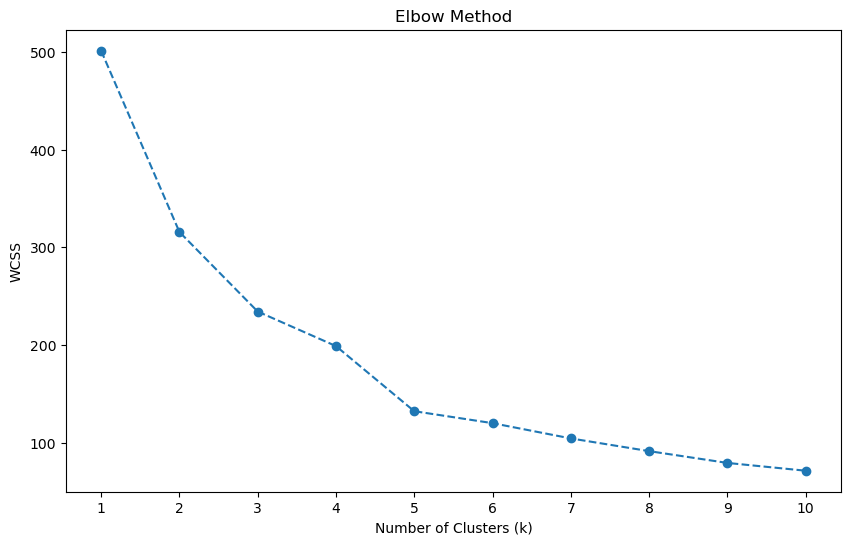

In [33]:
# Apply the Elbow Method to find the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):  # Trying k from 1 to 10
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(new_data)
    wcss.append(model.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()


## Model Training

In [34]:
    model = KMeans(n_clusters=3, random_state=42)
    model.fit(new_data)

C:\Users\vicab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [35]:
model.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [36]:
data["Class"] = model.labels_

## Visualization

In [23]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


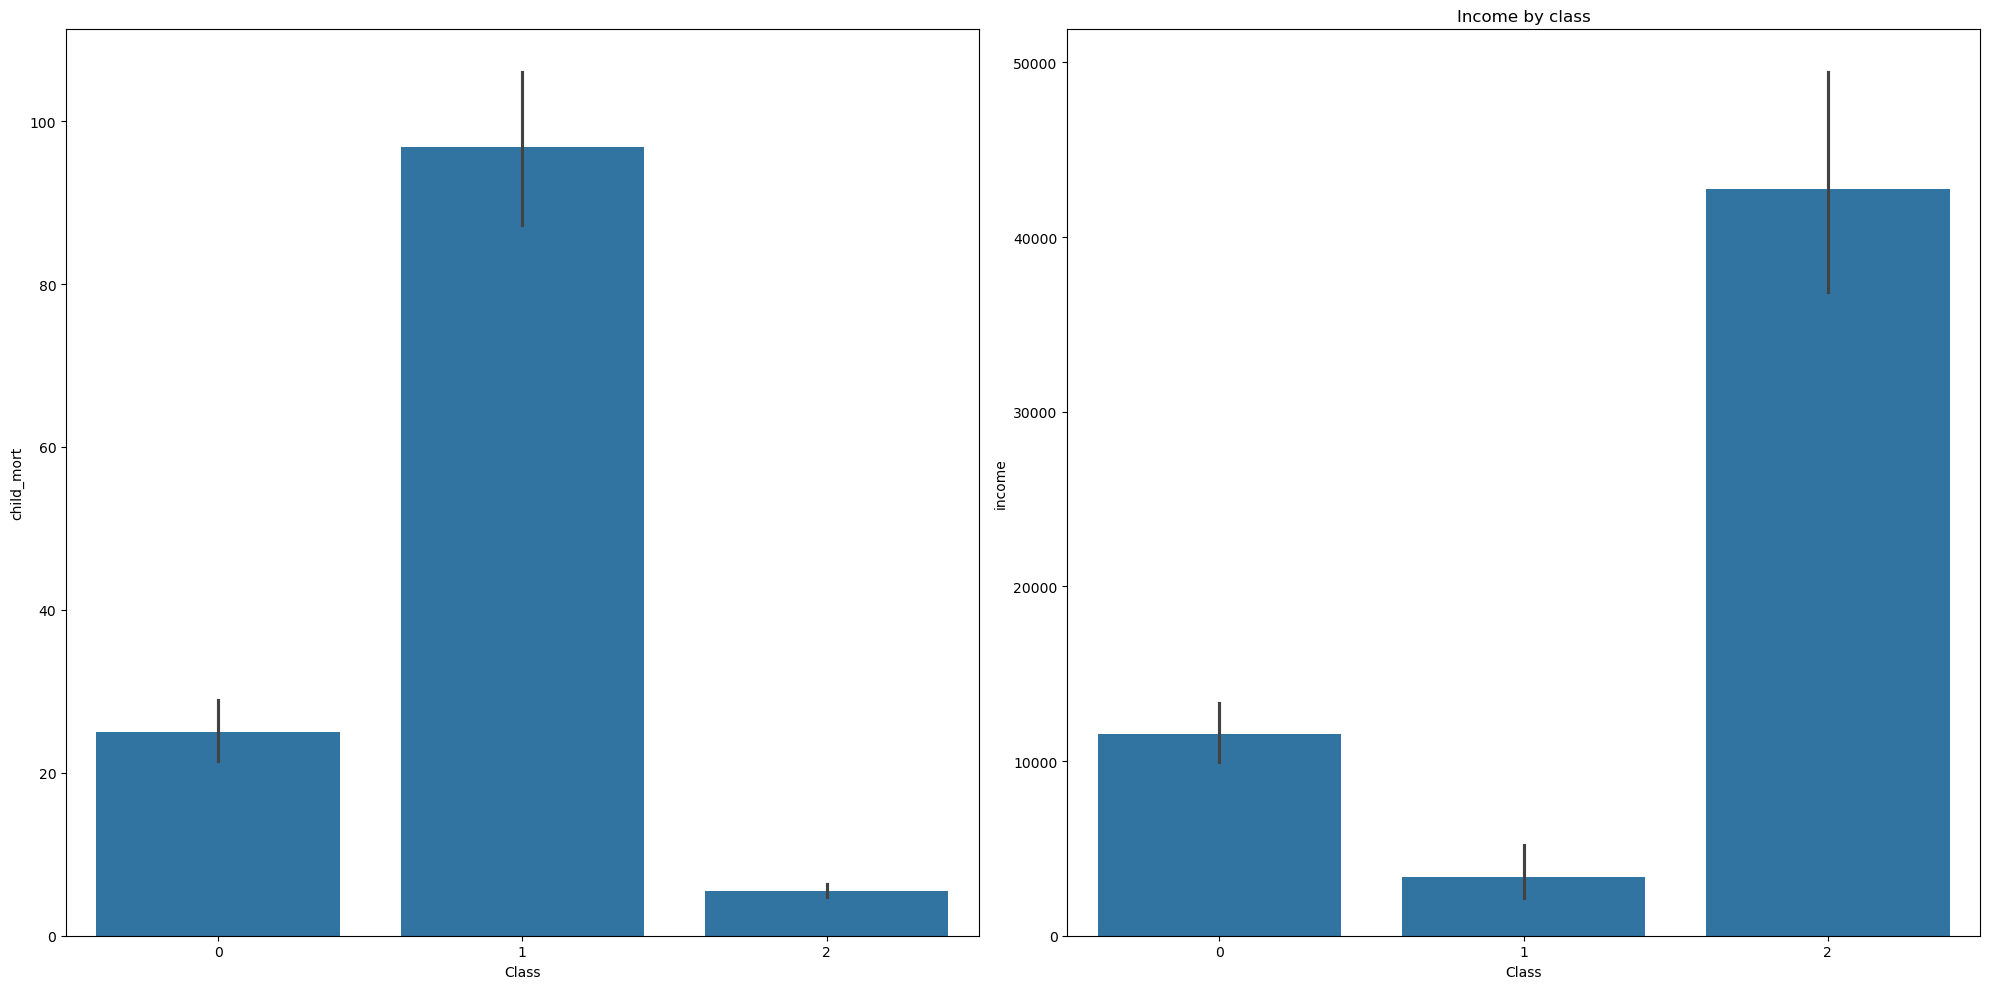

In [24]:
fig, position = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.barplot(x="Class", y="child_mort", data=data, ax=position[0])
plt.title("Child Mortality by class")

sns.barplot(x="Class", y="income", data=data, ax=position[1])
plt.title("Income by class")
plt.tight_layout()
plt.show()

It is clear to conlude that:

0 : Not a priority <br>
1 : Requires foreign aid <br>
2 : Do NOT requires foreign aid <br>

## Let rename the class

In [25]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0


In [26]:
data["Class"] = data["Class"].replace({0: "Not a priority",
                                      1: "Requires foreign aid",
                                      2: "Do NOT requires foreign aid"})

In [27]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Requires foreign aid
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Not a priority
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Not a priority
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Requires foreign aid
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Not a priority


## Plot an interactive GeoMAP showing these category

In [28]:
import plotly.express as px

In [29]:
data[["country", "Class"]].head()

,country,Class
0,Afghanistan,Requires foreign aid
1,Albania,Not a priority
2,Algeria,Not a priority
3,Angola,Requires foreign aid
4,Antigua and Barbuda,Not a priority


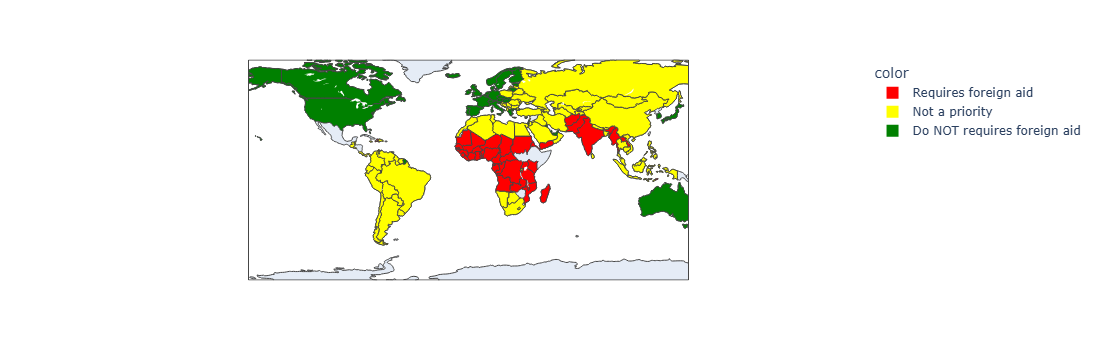

In [31]:
fig = px.choropleth(data[["country", "Class"]],
                   locationmode = "country names",
                    locations = "country",
                    color = data["Class"],
                    color_discrete_map = {"Requires foreign aid": "Red",
                     "Not a priority": "Yellow",
                     "Do NOT requires foreign aid":"green"}
                   )

fig.show()